In [1]:
# !pip install transformers
# !pip install torch
# !pip install requests
# !pip install pillow


  Using cached transformers-4.38.1-py3-none-any.whl.metadata (131 kB)
  Using cached huggingface_hub-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached regex-2023.12.25-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
  Using cached fsspec-2024.2.0-py3-none-any.whl.metadata (6.8 kB)
Using cached transformers-4.38.1-py3-none-any.whl (8.5 MB)
Using cached huggingface_hub-0.20.3-py3-none-any.whl (330 kB)
Using cached regex-2023.12.25-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (777 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.2 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 6.3 MB/s eta 0:00:000:00:01m eta 0:00:01m
Using cached fsspec-2024.2.0-py3-none-any.whl (170 kB)
  Using cached typing_extensions-4.9.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata 

In [1]:
from transformers import AutoImageProcessor, AutoModel
from PIL import Image
import requests


/home/suyodhan/Documents/Internship/Image Similarity/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-02-23 19:51:46.880110: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-23 19:51:46.915315: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-23 19:51:47.211515: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, reb

In [2]:
image1 = Image.open("/home/suyodhan/Documents/Internship/Image Similarity/bike1.png")
image2 = Image.open("/home/suyodhan/Documents/Internship/Image Similarity/bike2.png")


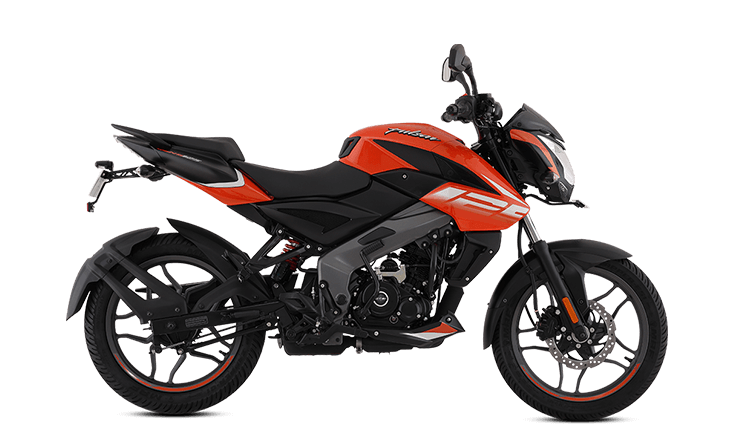

In [3]:
image1

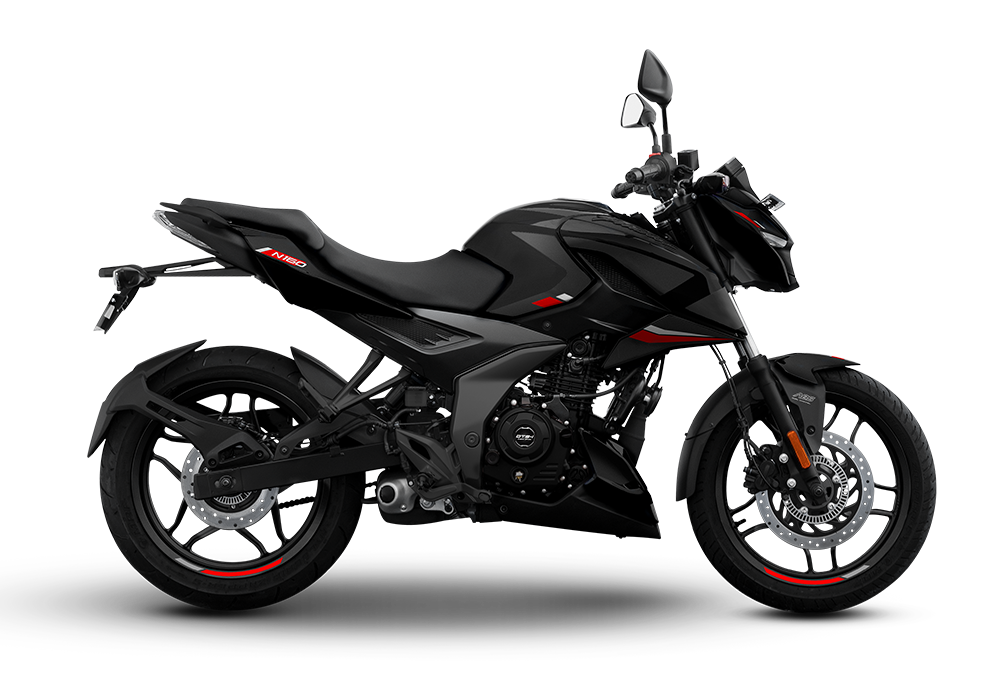

In [4]:
image2

In [5]:
processor = AutoImageProcessor.from_pretrained('facebook/dinov2-base')
model = AutoModel.from_pretrained('facebook/dinov2-base')

In [8]:
inputs = processor(images=image1, return_tensors="pt")
outputs = model(**inputs)
last_hidden_states_image1 = outputs.last_hidden_state




In [9]:
last_hidden_states_image1

tensor([[[ 2.8411, -4.4910,  2.2761,  ..., -1.6695,  2.1518, -0.7446],
         [-0.0454, -0.9793, -0.5084,  ..., -1.0219,  1.4456, -1.4284],
         [ 3.0671,  1.9707,  0.2310,  ...,  0.5890,  2.0748,  2.5142],
         ...,
         [ 2.5659,  1.7022, -2.6929,  ...,  2.4157,  2.7375, -0.0746],
         [ 2.0866,  1.7027, -0.7577,  ...,  0.0713,  2.5355, -1.1975],
         [ 1.0880,  0.6278,  1.5999,  ..., -0.3941, -0.1215,  0.9204]]],
       grad_fn=<NativeLayerNormBackward0>)

In [10]:
inputs = processor(images=image2, return_tensors="pt")
outputs = model(**inputs)
last_hidden_states_image2 = outputs.last_hidden_state

In [11]:
last_hidden_states_image2

tensor([[[ 3.2456, -3.3322,  2.4437,  ..., -1.7710,  1.5054, -0.6983],
         [ 0.5848, -0.3999, -0.9259,  ..., -1.0507,  0.2415, -1.0853],
         [ 3.1977,  0.8052,  0.6516,  ..., -0.2053,  1.1237,  1.0340],
         ...,
         [ 4.4474,  0.3937, -1.3138,  ...,  1.5297,  1.8850, -0.2543],
         [ 2.9414,  3.9151, -0.4633,  ...,  0.5836,  0.8219,  1.5417],
         [ 3.4069,  1.6068,  0.1522,  ..., -0.2577,  0.2324, -1.2996]]],
       grad_fn=<NativeLayerNormBackward0>)

In [12]:
# Assuming 'output' is your PyTorch tensor
array_image1 = last_hidden_states_image1.detach().numpy()

array_image2 = last_hidden_states_image2.detach().numpy()

In [13]:
# # Assuming 'array_image1' and 'array_image2' are your embeddings
# array_image11 = array_image1.squeeze()  # Remove the first dimension
# array_image22 = array_image2.squeeze()  # Remove the first dimension



In [14]:
# # Reshape the arrays to have a single dimension
# array_image1_flat = array_image1.reshape(1, -1)
# array_image2_flat = array_image2.reshape(1, -1)
array_image1_flat = array_image1.flatten()
array_image2_flat = array_image2.flatten()



In [15]:
array_image1_flat

array([ 2.8411264 , -4.4909873 ,  2.276084  , ..., -0.39407584,
       -0.12149002,  0.9203829 ], dtype=float32)

In [16]:
import numpy as np


In [17]:
def cosine_similarity(image1_embedding, current_embedding) -> bool:
    # Handle case where one or both embeddings are None
    if image1_embedding is None or current_embedding is None:
        return 0.0
    
    return np.dot(image1_embedding, current_embedding) / (np.linalg.norm(image1_embedding) * np.linalg.norm(current_embedding))

In [18]:
score = cosine_similarity(array_image1_flat, array_image2_flat)

In [19]:
score

0.7385888

In [109]:
from sklearn.metrics.pairwise import cosine_similarity

In [110]:
# Calculate cosine similarity
similarity_score = cosine_similarity(array_image1_flat, array_image2_flat)
print("Cosine Similarity Score:", similarity_score)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.11078449 -1.1352072   0.0965541  ... -1.109631   -1.8503368
  2.7909665 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.